In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

In [2]:
df = pd.read_csv("/content/diminos_data.csv")
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [3]:
df.shape

(15000, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [5]:
df.describe()

,order_id
count,1.500000e+04
mean,1.530610e+06
std,4.330271e+03
min,1.523111e+06
25%,1.526861e+06
50%,1.530610e+06
75%,1.534360e+06
max,1.538110e+06


In [6]:
df.isnull().sum()

,0
order_id,0
order_placed_at,0
order_delivered_at,0


In [7]:
df.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at'], dtype='object')

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df = df.drop_duplicates()

In [10]:
df["order_placed_at"] = pd.to_datetime(df["order_placed_at"])
df["order_delivered_at"] = pd.to_datetime(df["order_delivered_at"])

In [11]:
df.dtypes

,0
order_id,int64
order_placed_at,datetime64[ns]
order_delivered_at,datetime64[ns]


In [12]:
df["delivery_time"] = (
    df["order_delivered_at"] - df["order_placed_at"]
).dt.total_seconds() / 60

In [13]:
df["delivery_time"].isnull().sum()

np.int64(0)

In [14]:
df["delivery_time"].describe()

,delivery_time
count,15000.000000
mean,20.499389
std,96.160362
min,15.000010
25%,15.274826
50%,15.797986
75%,17.279661
max,7299.831375


In [15]:
df = df[df["delivery_time"] <= 120]

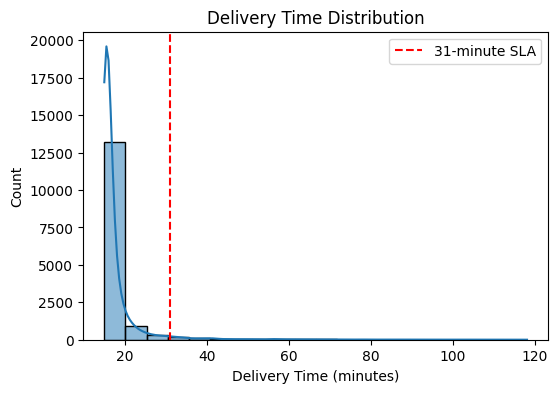

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(df["delivery_time"], bins=20, kde=True)
plt.axvline(31, color="red", linestyle="--", label="31-minute SLA")
plt.title("Delivery Time Distribution")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Count")
plt.legend()
plt.show()

In [17]:
p85 = np.percentile(df["delivery_time"], 85)
p85

np.float64(18.952211108333334)

In [18]:
late_percentage = (df["delivery_time"] > 31).mean() * 100
late_percentage

np.float64(3.2683678253298507)

🔍 Insights & Observations

Delivery time was calculated using the difference between order placed and delivered timestamps.

After removing unrealistic outliers, most deliveries fall well below the 31-minute SLA.

The 85th percentile delivery time is ~18.95 minutes, which is significantly below the required 31 minutes.

Only ~3.27% of orders exceed the 31-minute delivery promise.

✅ Conclusion

The analysis clearly shows that the store meets Dominos’ delivery performance benchmark.
Since the 85th percentile delivery time is well below 31 minutes, the majority of customers receive their orders on time.
Maintaining the current delivery process and monitoring peak-hour operations will help sustain this strong performance.